In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

general_data = pd.read_csv("Dataset1.csv")
general_data.head()

,Gauge,Level,Flood
0,0.0,5,0
1,0.0,4,0
2,0.0,3,0
3,0.0,5,0
4,0.0,5,0


In [2]:
general_data.info()
general_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gauge   1152 non-null   float64
 1   Level   1152 non-null   int64  
 2   Flood   1152 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 27.1 KB


,Gauge,Level,Flood
count,1152.000000,1152.000000,1152.000000
mean,1.592856,4.375868,0.003472
std,9.182636,2.173661,0.058849
min,0.000000,2.000000,0.000000
25%,0.000000,3.000000,0.000000
50%,0.000000,4.000000,0.000000
75%,0.000000,5.000000,0.000000
max,131.060000,22.000000,1.000000


D:\dimas\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\dimas\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\dimas\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

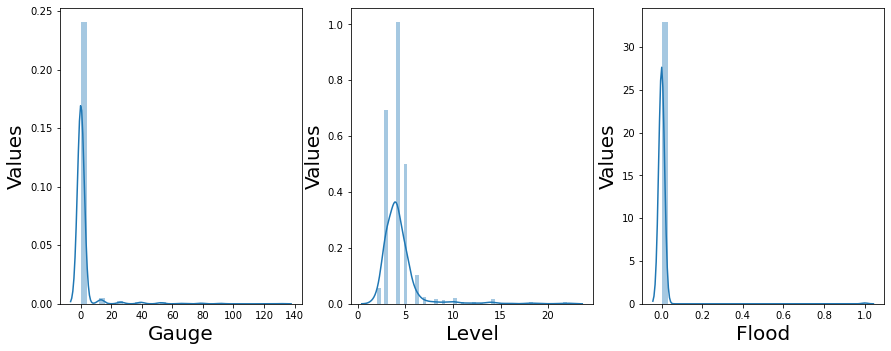

In [3]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in general_data:
  if plotnumber<4:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(general_data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Values',fontsize=20)
  plotnumber+=1
plt.show()

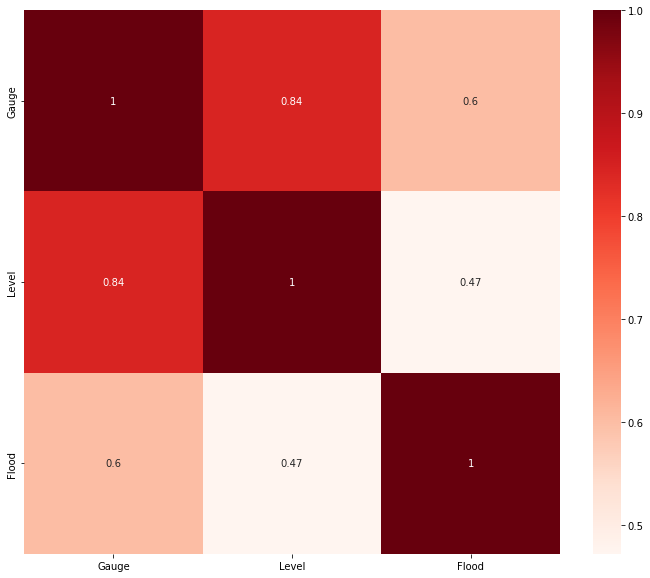

In [4]:
%matplotlib inline
plt.figure(figsize=(12,10))
cor = general_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
general_data.iloc[:, [0,1]]

,Gauge,Level
0,0.0,5
1,0.0,4
2,0.0,3
3,0.0,5
4,0.0,5
...,...,...
1147,0.0,4
1148,0.0,4
1149,0.0,4
1150,0.0,3


In [6]:
general_data.iloc[:, [2]]

,Flood
0,0
1,0
2,0
3,0
4,0
...,...
1147,0
1148,0
1149,0
1150,0


In [7]:
X = general_data.iloc[:, [0,1]].values
y = general_data.iloc[:, [2]].values

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [9]:
x = general_data.iloc[:, [0,1]].values
y = general_data.iloc[:, [2]].values

from sklearn.model_selection import KFold
kf=KFold(n_splits=10, shuffle=False)
print(kf)  
i=1       
for train_index, test_index in kf.split(x):
    print("Fold ", i)
    print("TRAIN :", train_index, "TEST :", test_index)
    x_train=x[train_index]
    x_test=x[test_index]
    y_train=y[train_index]
    y_test=y[test_index]
    i+=1
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)

KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 116  117  118 ... 1149 1150 1151] TEST : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115]
Fold  2
TRAIN : [   0    1    2 ... 1149 1150 1151] TEST : [116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 

In [10]:
#Logistic Regression

accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['Logistic Regression']=acc*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Accuracy score of the model is: 100.0 %


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [11]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred)
accuracies['KNeighborsClassifier']=acc1*100

accuracy_score(y_train,knn.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Accuracy score of the model is: 100.0 %


D:\dimas\py\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
#SVC

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVC']=acc2*100

accuracy_score(y_train,svc.predict(x_train))

print("Accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Accuracy score of the model is: 100.0 %


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [13]:
#decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
accuracies['DecisionTreeClassifier']=acc3*100

accuracy_score(y_train,dtc.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Accuracy score of the model is: 100.0 %


In [14]:
#Random forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)


acc5=accuracy_score(y_test,y_pred5)
accuracies['RandomForestClassifier']=acc5*100


accuracy_score(y_train,rfc.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

C:\Users\FORMUL~1\AppData\Local\Temp/ipykernel_3112/3016033601.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


Accuracy score of the model is: 100.0 %


In [15]:
from sklearn.metrics import f1_score

f1_logistic = f1_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred1)
f1_svm = f1_score(y_test, y_pred2)
f1_dt = f1_score(y_test, y_pred3)
f1_rf = f1_score(y_test, y_pred5)
# print the f-1 scores
print('F1-score of logistic regression: {}'.format(np.round(f1_logistic,4)))
print('F1-score of KNN: {}'.format(np.round(f1_knn,4)))
print('F1-score of SVM: {}'.format(np.round(f1_svm,4)))
print('F1-score of Decision tree classifier: {}'.format(np.round(f1_dt,4)))
print('F1-score of Random Forest: {}'.format(np.round(f1_rf,4)))

F1-score of logistic regression: 0.0
F1-score of KNN: 0.0
F1-score of SVM: 0.0
F1-score of Decision tree classifier: 0.0
F1-score of Random Forest: 0.0


D:\dimas\py\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
D:\dimas\py\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
D:\dimas\py\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
D:\dimas\py\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
D:\dimas\py\lib\